## Importing library and loading processed data

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
nlp = spacy.load('en_core_web_sm')
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
from matplotlib import pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter
import plotly.tools as tls
import plotly.graph_objs as go
import base64
import numpy as np
import pandas as pd

import plotly.offline as py
py.init_notebook_mode(connected=True)

%matplotlib inline


In [3]:
df = pd.read_csv(
    'D:/Projects/Topic modelling/Code/topic_modelling/data_cleaning/Cleaned.csv')


In [4]:
df.head()

,Unnamed: 0,date,id,content,user,reply_count,retweet_count,likecount,quotecount,ct
0,0,2021-10-17 04:41:51+00:00,1.450000e+18,@SujibDr Thank Sir for the information. Last d...,https://twitter.com/MrinChemKar,0,0,0,0,thank information predict disastrous
1,1,2021-10-17 03:17:40+00:00,1.450000e+18,@biswajitmohanty when v hav allowed well entre...,https://twitter.com/amphan_may2020,0,0,0,0,century matter catch drug peddling
2,2,2021-10-16 15:06:12+00:00,1.450000e+18,"From the cities to the villages, Amphan left B...",https://twitter.com/ishadrita,1,0,1,0,left climate crisis
3,3,2021-10-16 15:03:42+00:00,1.450000e+18,"What many have mocked as my claim to stardom, ...",https://twitter.com/ishadrita,0,0,5,0,claim stardom believe night life floor apartment
4,4,2021-10-16 08:31:43+00:00,1.450000e+18,#WorldFogoodDay2021 \nIn the cyclone Amphan de...,https://twitter.com/ri_montu,0,7,17,0,area coast hard fogood time live price rice br...


In [5]:
df.isna().sum()

Unnamed: 0       0
date             0
id               0
content          0
user             0
reply_count      0
retweet_count    0
likecount        0
quotecount       0
ct               1
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.shape

(51433, 10)

## Removing stopwords


In [8]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])


In [9]:
df['ct'] = df['ct'].apply(lambda x: remove_stopwords(x))

In [10]:
df['ct']

0                     thank information predict disastrous
1                       century matter catch drug peddling
2                                      left climate crisis
3         claim stardom believe night life floor apartment
4        area coast hard fogood time live price rice br...
                               ...                        
51429                           understand produce musical
51430                         fantastic sort gross theater
51431                                 pick pair glass cool
51432                               orchestra listen music
51433                        homework listen music instead
Name: ct, Length: 51433, dtype: object

In [11]:
text=df.ct.values.tolist()

## Modelling

In [12]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print("="*70)


In [13]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

class LemmaCountVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))


In [14]:
tf_vectorizer = LemmaCountVectorizer(max_df=0.95,
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)


## NNMF

In [15]:
from sklearn.decomposition import NMF


In [16]:
nmf = NMF(n_components=10, solver="mu")

W = nmf.fit_transform(tf)


C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



In [17]:
W

array([[1.24267544e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.32723529e-04],
       [2.26096571e-03, 1.40045716e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.52616251e-03, 2.00573111e-05],
       [2.37252356e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.90043947e-08, 1.39739380e-03],
       ...,
       [5.15941016e-04, 4.60845933e-04, 0.00000000e+00, ...,
        0.00000000e+00, 3.81084017e-04, 5.43211937e-04],
       [4.78303369e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.34864924e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [18]:
# params = {
#     'n_components': [10, 12, 15],
#     'learning_decay': [0.75, 0.80, 0.85]
# }

# lda_search = GridSearchCV(lda,
#                           param_grid=params,
#                           cv=3,
#                           return_train_score=False)

# lda_search.fit(tf)

# results = pd.DataFrame(lda_search.cv_results_)


## Getting our topics from the data using LDA

In [19]:
tf_feature_names = tf_vectorizer.get_feature_names()
n_top_words=30
print_top_words(nmf, tf_feature_names, n_top_words)



Topic #0:devastate situation face leave pandemic destruction crisis thank time minister hope post world support fight lose trail life bad million city government think flood save attack locust country visit loss

Topic #1:wind speed heavy rain high rainfall coastal extremely strong alert intense afternoon weather update hour near forecast surge cross morning maximum cate close tomorrow current velocity increase department meteorological evening

Topic #2:stay home strong hope alert indoors care panic soon scary inside away follow family careful bless shall bad love dangerous pas indoor calm dear house tune night happen crucial experience

Topic #3:day electricity water power area service supply connection work restore post restoration mobile road customer city connectivity drinking phone provide electric food problem past local long week care number suffer

Topic #4:medium coverage cover social shame republic attention international channel silent brief talk hardly care busy silence f

C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



## Visualising our wordcloud for topics

In [20]:
first_topic = nmf.components_[7]
first_topic_words = [tf_feature_names[i]
                     for i in first_topic.argsort()[:-50 - 1:-1]]

second_topic = nmf.components_[1]
second_topic_words = [tf_feature_names[i]
                     for i in second_topic.argsort()[:-50 - 1:-1]]

third_topic = nmf.components_[2]
third_topic_words = [tf_feature_names[i]
                     for i in third_topic.argsort()[:-50 - 1:-1]]


fourth_topic = nmf.components_[8]
fourth_topic_words = [tf_feature_names[i]
                     for i in third_topic.argsort()[:-50 - 1:-1]]


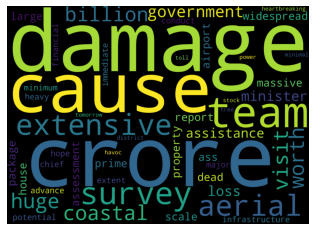

In [21]:
from wordcloud import WordCloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

firstcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()


Here the talk is about the surveys done by the government,officials,teams,etc including aerial survey to check the situation of the disaster that has caused huge/extensive amount of damager that may have caused crore of rupees

<!-- Here the talk is about funds where the people are in need in assistance and they are questioning the govt about funds, individual organisation have come in help of people affected and even people are askked to make donation for the affected. -->

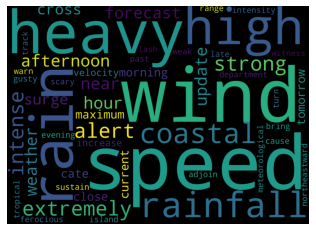

In [22]:
secondcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(second_topic_words))
plt.imshow(secondcloud)
plt.axis('off')
plt.show()


Here the talk is all about the extreme climatic events that have occured due to the cyclone like high wind speed,floods,rains,etc. and that has made the people alerted and they are continously updated of the situation

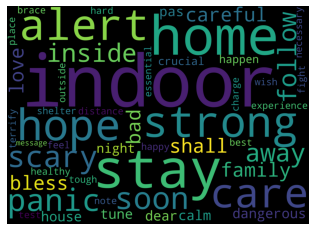

In [23]:
thirdcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=2500,
    height=1800
).generate(" ".join(third_topic_words))
plt.imshow(thirdcloud)
plt.axis('off')
plt.show()


The above wordcloud states the intensiveness of the cyclone that was about to struck the cast or have struck the coast.People were scared as it was a category 5 cyclone. Everyone seems to be caring about each other


## Predict topics for given sentence

In [24]:
df_topic_keywords = pd.DataFrame(nmf.components_)


In [25]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in [
                         '-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out


def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=[
                             'NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = tf_vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = nmf.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(
        topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores





In [26]:
mytext = ["Feared from cyclone"]
topic, prob_scores = predict_topic(text=mytext)


In [27]:
nmf_output = nmf.transform(tf)


## Cluster documents that share same topic and similar topics

In [28]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(nmf_output)

svd_model = TruncatedSVD(n_components=2)  
nmf_output_svd = svd_model.fit_transform(nmf_output)

x = nmf_output_svd[:, 0]
y = nmf_output_svd[:, 1]

print("Component's weights: \n", np.round(svd_model.components_, 2))

print("Perc of Variance Explained: \n", np.round(
    svd_model.explained_variance_ratio_, 2))


Component's weights: 
 [[ 0.35  0.34  0.36  0.47  0.21  0.19  0.24  0.26  0.3   0.34]
 [-0.08  0.3   0.53 -0.58 -0.39 -0.16  0.16 -0.06  0.27  0.06]]
Perc of Variance Explained: 
 [0.09 0.12]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

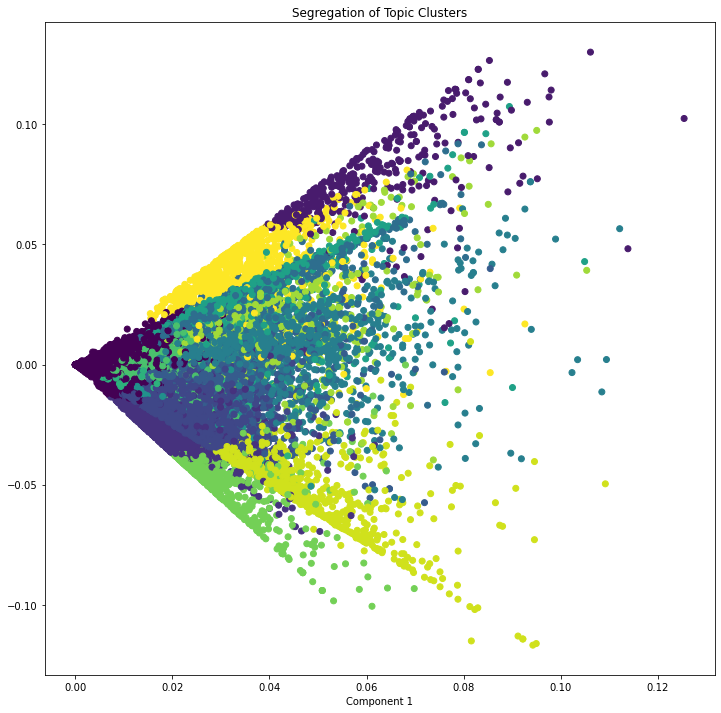

In [29]:
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )


In [30]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(nmf_output)

svd_model = TSNE(n_components=2)
nmf_output_svd = svd_model.fit_transform(nmf_output)

x = nmf_output_svd[:, 0]
y = nmf_output_svd[:, 1]



C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Text(0.5, 1.0, 'Segregation of Topic Clusters')

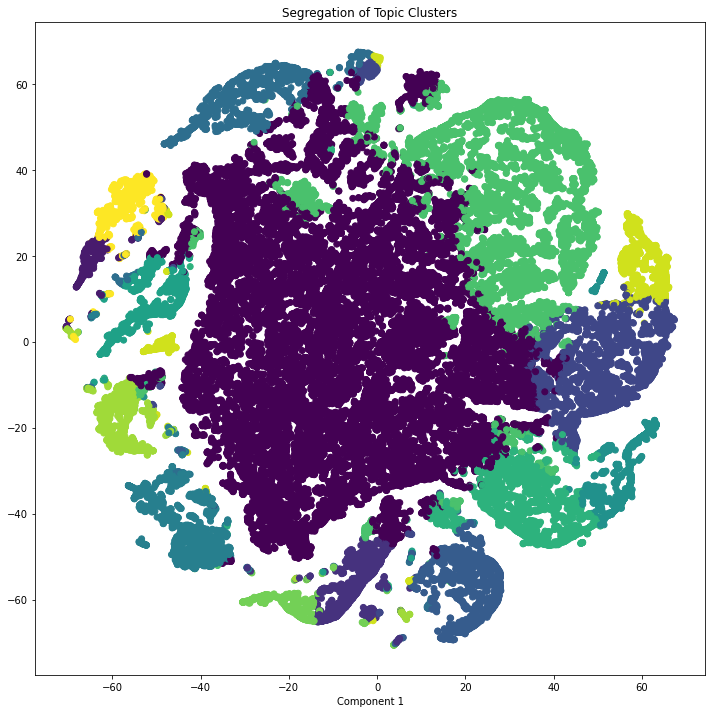

In [31]:
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )
